# 파이썬 기초

(예시)
1. mpg 변수를 min-max scaling하고 0.5가 넘는 데이터 개수를 구하시오
2. gear가 3과 4인 자동차 그룹의 mpg 평균값 차이를 절대값으로 구하시오
3. mpg 변수의 상자그림을 기준으로 이상치의 개수를 구하시오

(내용)
1. 데이터 타입(object, int, float, bool 등)
2. 기초통계량(평균, 중앙값, 사분위수, IQR, 표준편차 등)
3. 데이터 인덱싱, 필터링, 정렬, 변경 등
4. 중복값, 결측치, 이상치 처리 (제거 or 대체)
5. 데이터 Scaling (데이터 표준화(z), 데이터 정규화(min-max))
6. 데이터 합치기
7. 날짜/시간 데이터, index 다루기

(트렌드)
- 날짜 데이터(4회)
- 파생변수 생성(5회)
- 시간 데이터(6회)

In [1]:
import pandas as pd
import numpy as np

In [14]:
import os
os.getcwd()

'C:\\Users\\Hyunsoo Kim\\Desktop\\senior_grade\\자격증\\빅분기\\practical_test'

In [2]:
# Import CSV mtcars
df = pd.read_csv('mtcars.txt')
df.head()

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


## 1.데이터 타입(object, int, float, bool 등)

In [19]:
# 데이터 타입 확인
df.dtypes

car      object
mpg     float64
cyl       int64
disp    float64
hp        int64
drat    float64
wt      float64
qsec    float64
vs        int64
am        int64
gear      int64
carb      int64
dtype: object

In [20]:
# 데이터 타입 변경 (1개)
df1 = df.copy()
df1 = df1.astype({'cyl':'object'})
print(df1.dtypes)

car      object
mpg     float64
cyl      object
disp    float64
hp        int64
drat    float64
wt      float64
qsec    float64
vs        int64
am        int64
gear      int64
carb      int64
dtype: object


In [21]:
# 데이터 타입 변경 (2개 이상)
df1 = df.copy()
df1 = df1.astype({'cyl':'int', 'gear':'object'})
print(df1.dtypes)

car      object
mpg     float64
cyl       int32
disp    float64
hp        int64
drat    float64
wt      float64
qsec    float64
vs        int64
am        int64
gear     object
carb      int64
dtype: object


In [24]:
#df1['cyl']

In [23]:
df1['cyl'].value_counts()

8    14
4    11
6     7
Name: cyl, dtype: int64

## 2. 기초통계량(평균, 중앙값, 사분위수, IQR, 표준편차 등)

In [25]:
# Import CSV mtcars
df = pd.read_csv('mtcars.txt')
df.head()

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [26]:
df.shape # (행, 열)

(32, 12)

In [28]:
# 평균값 구하기
mpg_mean = df['mpg'].mean()
print(mpg_mean)

20.090624999999996


In [29]:
# 중앙값 구하기
mpg_median = df['mpg'].median()
print(mpg_median)

19.2


In [32]:
# 최빈값 구하기
cyl_mode = df['cyl'].mode()
print(cyl_mode)

0    8
Name: cyl, dtype: int64


In [33]:
df['cyl'].value_counts()

8    14
4    11
6     7
Name: cyl, dtype: int64

In [34]:
# 분산
mpg_var = df['mpg'].var()
print(mpg_var)

36.32410282258065


In [35]:
# 표준편차
mpg_std = df['mpg'].std()
print(mpg_std)

6.026948052089105


In [36]:
# IQR (Q3 - Q1)
Q1 = df['mpg'].quantile(.25)
print(Q1)

15.425


In [37]:
Q3 = df['mpg'].quantile(.75)
print(Q3)

22.8


In [38]:
IQR = Q3 - Q1
print(IQR)

7.375


In [39]:
Q2 = df['mpg'].quantile(.5)
print(Q2)
print(df['mpg'].median()) # 2사분위수와 중앙값은 동일한 값을 출력 

19.2
19.2


In [40]:
# 범위(Range) = 최대값 - 최소값
mpg_max = df['mpg'].max()
print(mpg_max)

33.9


In [41]:
mpg_min = df['mpg'].min()
print(mpg_min)

10.4


In [42]:
mpg_range = mpg_max - mpg_min
print(mpg_range)

23.5


### 1) 분포의 비대칭도

In [43]:
# 왜도
mpg_skew = df['mpg'].skew()
print(mpg_skew)

0.6723771376290805


In [44]:
# 첨도
mpg_kurt = df['mpg'].kurt()
print(mpg_kurt)

-0.0220062914240855


### 2) 기타(합계, 절대값, 데이터 수 등)

In [45]:
# 합계
mpg_sum = df['mpg'].sum()
print(mpg_sum)

642.9000000000001


In [46]:
# 절대값
IQR2 = Q1 - Q3
print(IQR2)
print(abs(IQR2))

-7.375
7.375


In [47]:
# 데이터 수
print(len(df['mpg']))

32


### 3) 그룹화하여 계산하기 (groupby 활용)

In [49]:
import seaborn as sns
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [51]:
# species 별로 각 변수의 평균 구해보기
df.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [52]:
df.groupby('species').median()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.0,3.4,1.50,0.2
versicolor,5.9,2.8,4.35,1.3
virginica,6.5,3.0,5.55,2.0


## 3. 데이터 인덱싱, 필터링, 정렬, 변경 등

In [53]:
df = pd.read_csv('mtcars.txt')
df.head()

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


### 1) 데이터 인덱싱

인덱싱 - 행, 열을 기준으로 데이터값을 기준으로 뽑는 것

In [54]:
# 행/열 인덱싱 : df.loc['행', '열']
df.loc[3, 'mpg'] # 인덱싱은 0부터 시작임 

21.4

In [57]:
# 열만 인덱싱
df.loc[:, 'mpg'].head() # ':' 는 전체를 가지고 올 때(빈칸으로 두면 에러)

0    21.0
1    21.0
2    22.8
3    21.4
4    18.7
Name: mpg, dtype: float64

In [58]:
df.loc[0:3, ['mpg', 'cyl', 'disp']] # 행에서 0~3번 사이의 인덱스를 가지고 와라

,mpg,cyl,disp
0,21.0,6,160.0
1,21.0,6,160.0
2,22.8,4,108.0
3,21.4,6,258.0


In [60]:
df.loc[0:3, 'mpg':'disp']  # 열에서 mpg와 disp 사이의 변수를 가지고 와라

,mpg,cyl,disp
0,21.0,6,160.0
1,21.0,6,160.0
2,22.8,4,108.0
3,21.4,6,258.0


In [61]:
# 앞에서 n행 인덱싱
df.head(2)

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.9,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.9,2.875,17.02,0,1,4,4


In [62]:
# 뒤에서 n행 인덱싱
df.tail(3)

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
29,Ferrari Dino,19.7,6,145.0,175,3.62,2.77,15.5,0,1,5,6
30,Maserati Bora,15.0,8,301.0,335,3.54,3.57,14.6,0,1,5,8
31,Volvo 142E,21.4,4,121.0,109,4.11,2.78,18.6,1,1,4,2


### 2) 열(Columns) 추가/제거

In [63]:
# 열 선택
df_cyl = df['cyl']
df_cyl.head(3) # df.cyl.head(3) 같은 결과 비추

0    6
1    6
2    4
Name: cyl, dtype: int64

In [66]:
df_new = df[['cyl','mpg']]
df_new.head(3)

,cyl,mpg
0,6,21.0
1,6,21.0
2,4,22.8


In [67]:
# 열 제거
df.drop(columns = ['car','mpg','cyl']).head(3)

,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,160.0,110,3.90,2.620,16.46,0,1,4,4
1,160.0,110,3.90,2.875,17.02,0,1,4,4
2,108.0,93,3.85,2.320,18.61,1,1,4,1


In [3]:
# 열 추가
df2 = df.copy()
df2['new'] = df['mpg'] + 10 # 새로운 컬럼으로 생김
df2.head(3)

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,new
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,31.0
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,31.0
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,32.8


### 3) 데이터 필터링

In [8]:
# 1개 조건 필터링
# cyl = 4 인 데이터의 수 
cond1 = (df['cyl'] == 4)
len(df[cond1])

# cyl_4 = df[df['cyl']==4]
# print(len(cyl_4))

11

In [10]:
# mpg 가 22 이상인 데이터 수
cond2 = (df['mpg'] >= 22)
len(df[cond2])

9

In [12]:
# 2개 조건 필터링 
df[cond1 & cond2]

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
17,Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1
18,Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2
19,Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1
25,Fiat X1-9,27.3,4,79.0,66,4.08,1.935,18.90,1,1,4,1
26,Porsche 914-2,26.0,4,120.3,91,4.43,2.140,16.70,0,1,5,2
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.90,1,1,5,2


In [13]:
# 2개 조건 필터링 후 데이터 개수 (and)
print(len(df[cond1 & cond2])) # print() 함수를 이용해서 개수를 출력해야 인정됨 

9

In [14]:
# 2개 조건 필터링 후 데이터 개수 (or)
df[cond1 | cond2]

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
17,Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1
18,Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2
19,Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1
20,Toyota Corona,21.5,4,120.1,97,3.70,2.465,20.01,1,0,3,1
25,Fiat X1-9,27.3,4,79.0,66,4.08,1.935,18.90,1,1,4,1
26,Porsche 914-2,26.0,4,120.3,91,4.43,2.140,16.70,0,1,5,2
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.90,1,1,5,2


In [15]:
print(len(df[cond1 | cond2]))

11


In [21]:
# 한번에 코딩할 경우
print(len(df[(df['cyl'] == 4) & (df['mpg'] >= 22)]))
print(len(df[(df['cyl'] == 4) | (df['mpg'] >= 22)])) # 이렇게 한번에 하면 실수할 가능성 존재 cond1,2를 만들어서 하는 것 추천

9
11


### 4) 데이터 정렬

In [22]:
# 내림차순 정렬 (위에서부터 내려간다)
df.sort_values('mpg', ascending=False).head()

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
19,Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1
17,Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.90,1,1,5,2
18,Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2
25,Fiat X1-9,27.3,4,79.0,66,4.08,1.935,18.90,1,1,4,1


In [23]:
# 오름차순 정렬 (아래에서부터 올라간다)
df.sort_values('mpg', ascending=True).head()

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
15,Lincoln Continental,10.4,8,460.0,215,3.00,5.424,17.82,0,0,3,4
14,Cadillac Fleetwood,10.4,8,472.0,205,2.93,5.250,17.98,0,0,3,4
23,Camaro Z28,13.3,8,350.0,245,3.73,3.840,15.41,0,0,3,4
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
16,Chrysler Imperial,14.7,8,440.0,230,3.23,5.345,17.42,0,0,3,4


### 5) 데이터 변경 (조건문)

In [28]:
import numpy as np 
df = pd.read_csv("mtcars.txt")
# np.where 활용
# hp 변수 값 중에서 205가 넘는 값은 205로 처리하고, 나머지는 그대로 유지
df['hp'] = np.where(df['hp'] > 205, 205, df['hp'])

# 내림차순 정렬 (위에서부터 내려간다)
df.sort_values('hp', ascending=False).head(10)

# 활용 : 이상치를 Max 값이나 Min 값으로 대체할 경우 조건문 활용

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
16,Chrysler Imperial,14.7,8,440.0,205,3.23,5.345,17.42,0,0,3,4
30,Maserati Bora,15.0,8,301.0,205,3.54,3.570,14.60,0,1,5,8
28,Ford Pantera L,15.8,8,351.0,205,4.22,3.170,14.50,0,1,5,4
6,Duster 360,14.3,8,360.0,205,3.21,3.570,15.84,0,0,3,4
23,Camaro Z28,13.3,8,350.0,205,3.73,3.840,15.41,0,0,3,4
15,Lincoln Continental,10.4,8,460.0,205,3.00,5.424,17.82,0,0,3,4
14,Cadillac Fleetwood,10.4,8,472.0,205,2.93,5.250,17.98,0,0,3,4
13,Merc 450SLC,15.2,8,275.8,180,3.07,3.780,18.00,0,0,3,3
11,Merc 450SE,16.4,8,275.8,180,3.07,4.070,17.40,0,0,3,3
12,Merc 450SL,17.3,8,275.8,180,3.07,3.730,17.60,0,0,3,3


## 4. 결측치, 이상치, 중복값 처리(제거 or 대체)

### &#128674; 데이터 불러오기 (타이타닉 데이터셋)

> 종속변수(y) : 생존 여부 (0 사망, 1 생존)

> 독립변수(x) : pclass, sex, age 등의 탑승자 정보(변수)

In [32]:
import seaborn as sns
# 데이터셋 목록 : sns.get_dataset_names()
# 타이타닉 데이터 불러오기
df = sns.load_dataset('titanic')

In [33]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [35]:
df.shape

(891, 15)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### 1) 결측치 확인 및 처리

In [38]:
# 결측치 확인 
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [41]:
# 결측치 제거
print(df.dropna(axis=0).shape) # 행 기준, default는 axis = 0 따로 설정 안해도 됨
print(df.dropna(axis=1).shape) # 열 기준

(182, 15)
(891, 11)


In [42]:
# 결측치 대체
# 데이터 복사 
df2 = df.copy()
df2 = pd.DataFrame(df) # df를 데이터 프레임 형태로 변환

In [43]:
# 1. 중앙값/평균값 등으로 대체

# 먼저 중앙값을 구합니다
median_age = df2['age'].median()
print(median_age)

# 평균으로 대체할 경우 
# mean_age = df2['age'].mean()

28.0


In [44]:
# 구한 중앙값으로 결측치를 대체합니다.
df2['age'] = df['age'].fillna(median_age)

In [45]:
# 결측치가 잘 대체되었는지 확인합니다
df2.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [46]:
print(df['age'].mean()) # 원본 데이터
print(df2['age'].mean()) # 중앙값으로 대체한 데이터 

29.69911764705882
29.36158249158249


In [47]:
# 중복값 확인
df.drop_duplicates().shape

(784, 15)

### 2) 이상치 확인 및 처리
### 	&#10004; 상자그림 활용 (이상치: Q1, Q3로부터 1.5*IQR을 초과하는 값)

C:\Users\Hyunsoo Kim\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

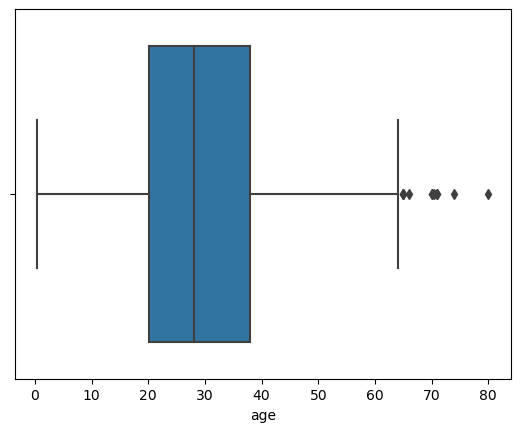

In [48]:
# 타이타닉 데이터 불러오기
df = sns.load_dataset('titanic')

# (참고) 상자그림
sns.boxplot(df['age'])

In [50]:
# Q1, Q3, IQR 구하기
Q1 = df['age'].quantile(.25)
Q3 = df['age'].quantile(.75)
IQR = Q3 - Q1
print(Q1, Q3, IQR)

20.125 38.0 17.875


In [51]:
upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR
print(upper, lower)

64.8125 -6.6875


In [54]:
# 문제 : age 변수의 이상치를 제외한 데이터 수는? (상자그림 기준)
cond1 = (df['age'] <= upper)
cond2 = (df['age'] >= lower)
print(len(df[cond1 & cond2]))
print(len(df[cond1]))
print(len(df))

703
703
891


In [55]:
# 문제 : age 변수의 이상치를 제외한 데이터셋 확인(상자그림 기준)
df_new = df[cond1 & cond2]
df_new

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### 	&#10004; 표준정규분포 활용(이상치 : **$\pm$** 3Z 값을 넘어가는 값)

In [56]:
# 데이터 표준화, Z = (개별값 -  평균) / 표준편차

In [58]:
mean_age = df['age'].mean()
std_age = df['age'].std()
print(mean_age)
print(std_age)

29.69911764705882
14.526497332334044


In [60]:
znorm = (df['age']-mean_age) / std_age
znorm

0     -0.530005
1      0.571430
2     -0.254646
3      0.364911
4      0.364911
         ...   
886   -0.185807
887   -0.736524
888         NaN
889   -0.254646
890    0.158392
Name: age, Length: 891, dtype: float64

In [62]:
# 문제 : 이상치의 개수는 몇개인가? (: ±3Z 기준)

In [63]:
cond1 = (znorm > 3)
len(df[cond1])

2

In [64]:
cond2 = (znorm < -3)
len(df[cond2])

0

In [65]:
print(len(df[cond1]) + len(df[cond2]))

2


### 3)  중복값 제거

In [66]:
# 데이터 불러오기
df = sns.load_dataset('titanic')

In [67]:
df.shape

(891, 15)

In [68]:
df1 = df.copy()
df1 = df1.drop_duplicates()
print(df1.shape)
# (주의) 예제에서는 중복값이 있어서 제거했지만,
# 중복값이 나올 수 있는 상황이변 제거할 필요없음

(784, 15)


## &#9989; 5. 데이터 scaling(데이터 표준화, 정규화)